<a href="https://colab.research.google.com/github/Valen-Nneji-007/pytorch-intro-/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch Workflow

What_were_covering = {1: "Data (prepare and load)",
                      2: "build model",
                      3: "Fitting the model to data(training)",
                      4: "making predictions and evaluating a model(inference)",
                      5: "saving and loading a model",
                      6: "Putting it all together"}


What_were_covering


{1: 'Data (prepare and load)',
 2: 'build model',
 3: 'Fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'Putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.4.0+cu121'

1. ##  Data (praparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheet
* Images of any Kind
* Videos (Youtube)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some known data using the linear regression formular

We will use a linear regression formula to make a straight line with known **parameters**




In [3]:
from sre_constants import LITERAL_UNI_IGNORE
# Create *Known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test set (One of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize visualize!!!"
'

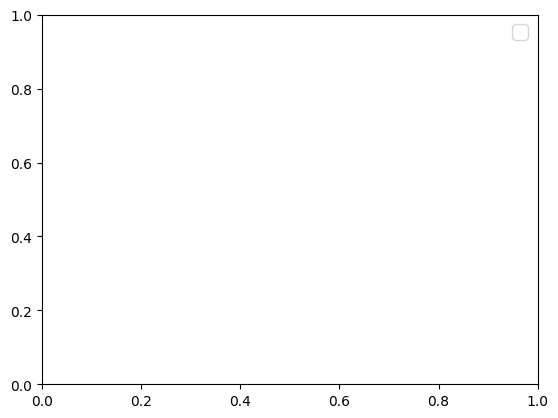

In [5]:
def plot_predictions(train_data =X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there prediction?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

# Show the legend
plt.legend(prop={"size":14});

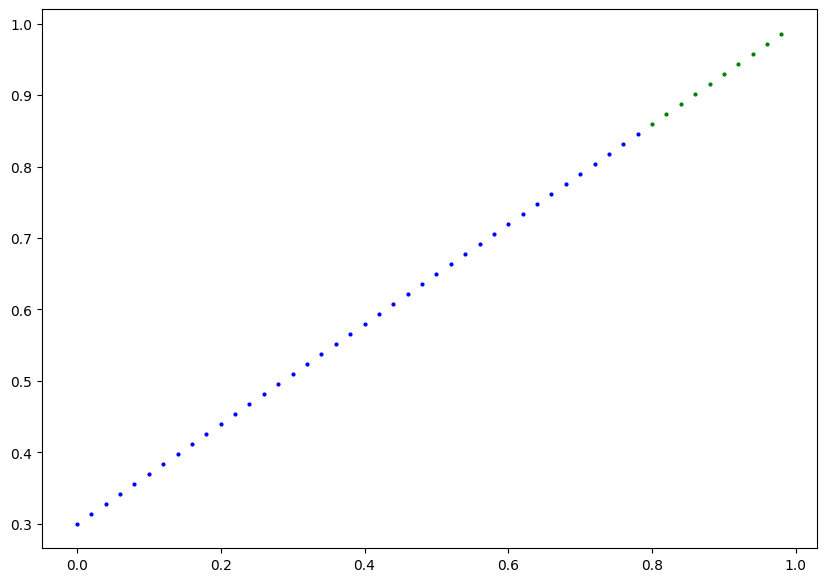

In [6]:
plot_predictions();

## Build model

Our first pytorch model!

This is very exciting.... let's do it

What our model does:
* Start with random values (weight & bias)
* Loo at training data and adjust the random values to better represent ( or get closer to) the ideal values ( the weight & bias values we used to create the data

# Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [7]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define thecomputation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<-"x" is the input data
    return self.weights * x + self.bias # this is the linear regression formular


### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torc.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we have created a model, let's see what is inside

so we can check out our model parameter or what is inside our model using .parameter()

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When will pass data through our model, it's ging to run it through the `forward()` method


In [10]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [11]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

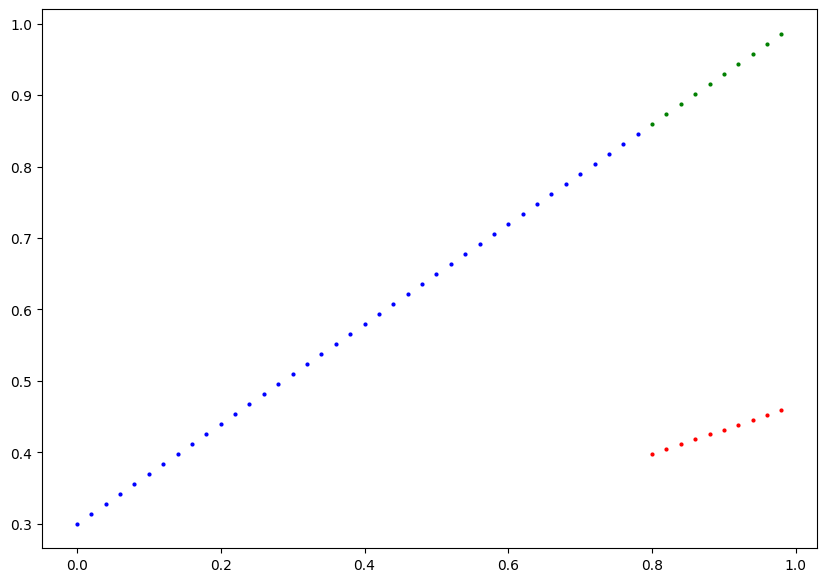

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unkown* parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss functions.

Note: Loss function may also be called a cost function or criterion in different areas. For our case, we are going to refer to it as a loss function.

**Things we need to train:**

**Loss Function:** A loss function measures how wrong your model's prediction are to the ideal outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g weight & bias in our case) to improve the loss function.

  * Inside the optimizers you will often have to set two parameters:
      
      * `params` - the model parameters you would like to optimize, for example `params=model_0.parameters()`

      * lr (Learning Rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters witheach step (a small `Lr` results in small changes, a large `Lr` results in large changes)

And specially for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()



# Setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)# lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A Couple of things we need in a training loop:
0. loop through the data
1. forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [17]:
# Random_Seed
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we have set it ourselves)
epochs =200

# Track Different Values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradient to a gradient require

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"List: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop



  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing(dropout/batch norm)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scene
    # 1. Do the forward pass
    test_pred= model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Training loss: {loss} | Test_loss: {test_loss}")

    # Print out model state_dict
    print(model_0.state_dict())



Epoch: 0 | Training loss: 0.31288138031959534 | Test_loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Training loss: 0.2059636414051056 | Test_loss: 0.17004327476024628
OrderedDict([('weights', tensor([0.5402])), ('bias', tensor([0.6123]))])
Epoch: 20 | Training loss: 0.12756267189979553 | Test_loss: 0.04101772978901863
OrderedDict([('weights', tensor([0.5053])), ('bias', tensor([0.4323]))])
Epoch: 30 | Training loss: 0.30201539397239685 | Test_loss: 0.4132081866264343
OrderedDict([('weights', tensor([0.4438])), ('bias', tensor([0.1148]))])
Epoch: 40 | Training loss: 0.2265455722808838 | Test_loss: 0.25684428215026855
OrderedDict([('weights', tensor([0.6911])), ('bias', tensor([0.5648]))])
Epoch: 50 | Training loss: 0.05583556368947029 | Test_loss: 0.04307566210627556
OrderedDict([('weights', tensor([0.6631])), ('bias', tensor([0.2898]))])
Epoch: 60 | Training loss: 0.2300843894481659 | Test_loss: 0.2082856446504593
OrderedD

In [18]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.20596364, 0.12756267, 0.3020154 , 0.22654557,
        0.05583556, 0.23008439, 0.29046553, 0.09397103, 0.22807398,
        0.3024477 , 0.1300081 , 0.19381407, 0.30794117, 0.16997352,
        0.15430947, 0.31260976, 0.19788244, 0.08395837, 0.27128014],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.1700),
  tensor(0.0410),
  tensor(0.4132),
  tensor(0.2568),
  tensor(0.0431),
  tensor(0.2083),
  tensor(0.4078),
  tensor(0.0997),
  tensor(0.0979),
  tensor(0.4824),
  tensor(0.0915),
  tensor(0.0383),
  tensor(0.4594),
  tensor(0.1806),
  tensor(0.0614),
  tensor(0.3555),
  tensor(0.3135),
  tensor(0.0791),
  tensor(0.1930)])

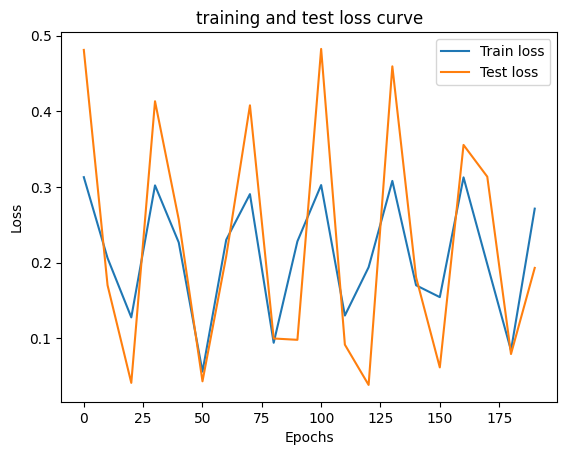

In [19]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3945])), ('bias', tensor([0.1633]))])

In [22]:
weight, bias

(0.7, 0.3)

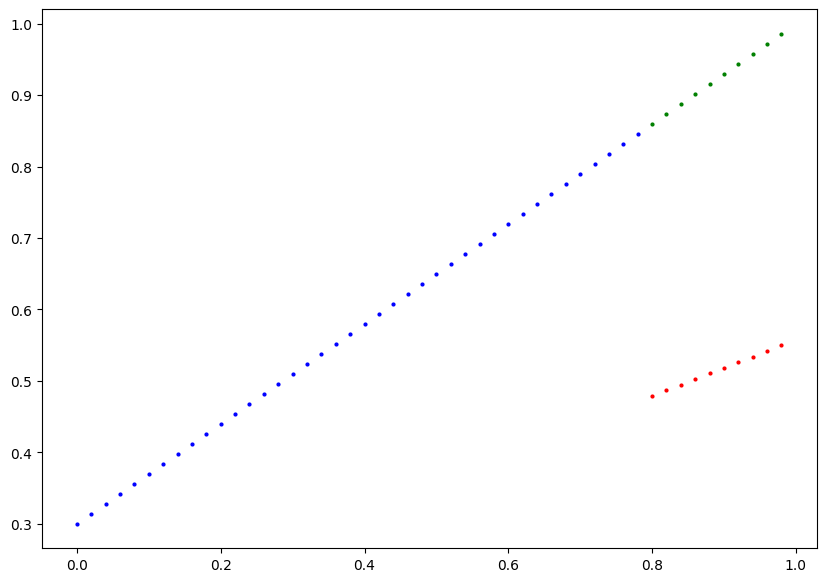

In [23]:
plot_predictions(predictions = y_preds_new);

 # Saving a model in PyTorch

 There are three main methods you should know about for saving and loading models in PyTorch.

 1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
 2. `torch.load()` - allows you to load a saved PyTorch object
 3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3945])), ('bias', tensor([0.1633]))])

In [25]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [26]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Sep  1 11:54 01_pytorch_workflow_model_0.pth


# loading a PyTorch model

Since we save our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3945])), ('bias', tensor([0.1633]))])

In [28]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-28-ade34efd9648>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3945])), ('bias', tensor([0.1633]))])

In [30]:
# Make some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds =loaded_model_0(X_test)

loaded_model_preds

tensor([[0.4789],
        [0.4868],
        [0.4947],
        [0.5026],
        [0.5105],
        [0.5184],
        [0.5262],
        [0.5341],
        [0.5420],
        [0.5499]])

In [31]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds =model_0(X_test)

In [32]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

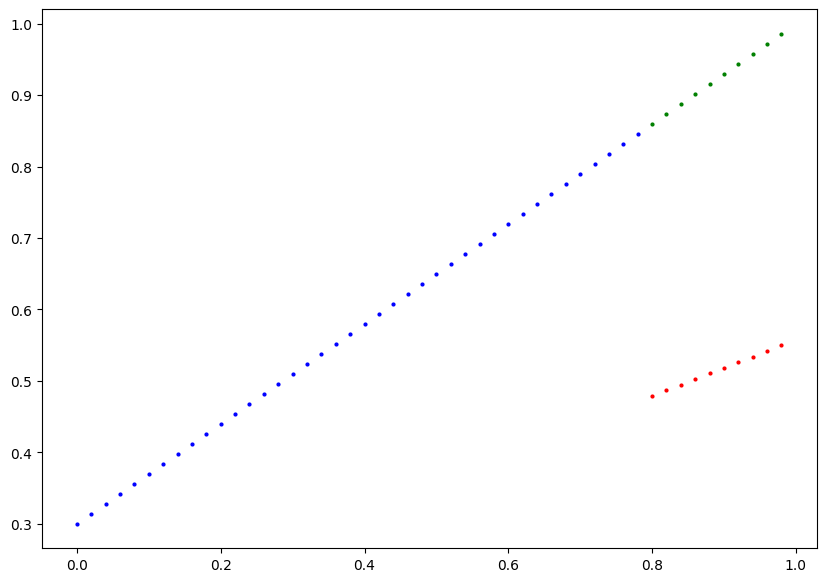

In [33]:
plot_predictions(predictions=loaded_model_preds)

## 6. Putting it all together

Let's go back throught the steps above and see it all in one place.

In [34]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.0+cu121'

**Create device-agnostic code.**

This means if we have got access to a GPU, our code will use it (for potentially faster computing).

if no GPU is available, the code will default to using CPU

In [35]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [36]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y  (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, error will pop out
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [37]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

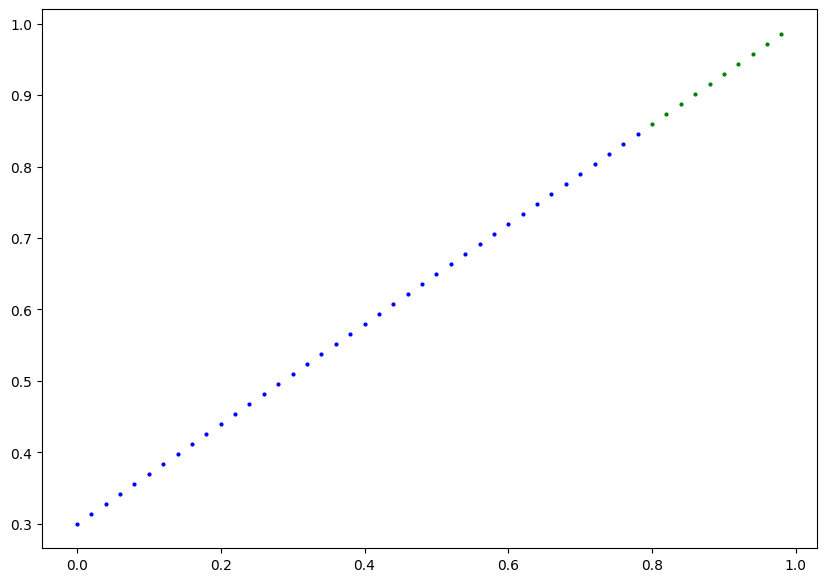

In [38]:
# Plot the data
# Note: if you don't have plot_predictions() function loaded, this will produce an error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [39]:
# Create a linear model by subclassing nn.Modue
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [40]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [41]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### Training

For training we need:

* Loss Function
* Optimizer
* Training Loop
* Testing Loop


In [42]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)





In [43]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Caculate the Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss= loss_fn(test_pred, y_test)

    # Print out what is happening

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}  | Loss: {loss}  | Test: {test_loss} ")



Epoch: 0  | Loss: 0.5551779866218567  | Test: 0.5739762187004089 
Epoch: 10  | Loss: 0.439968079328537  | Test: 0.4392664134502411 
Epoch: 20  | Loss: 0.3247582018375397  | Test: 0.30455657839775085 
Epoch: 30  | Loss: 0.20954833924770355  | Test: 0.16984669864177704 
Epoch: 40  | Loss: 0.09433845430612564  | Test: 0.03513690456748009 
Epoch: 50  | Loss: 0.023886388167738914  | Test: 0.04784907028079033 
Epoch: 60  | Loss: 0.019956795498728752  | Test: 0.045803118497133255 
Epoch: 70  | Loss: 0.016517987474799156  | Test: 0.037530567497015 
Epoch: 80  | Loss: 0.013089174404740334  | Test: 0.02994490973651409 
Epoch: 90  | Loss: 0.009653178043663502  | Test: 0.02167237363755703 
Epoch: 100  | Loss: 0.006215683650225401  | Test: 0.014086711220443249 
Epoch: 110  | Loss: 0.00278724217787385  | Test: 0.005814164876937866 
Epoch: 120  | Loss: 0.0012645035749301314  | Test: 0.013801801018416882 
Epoch: 130  | Loss: 0.0012645035749301314  | Test: 0.013801801018416882 
Epoch: 140  | Loss: 0.00

In [44]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluation predictions

In [45]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

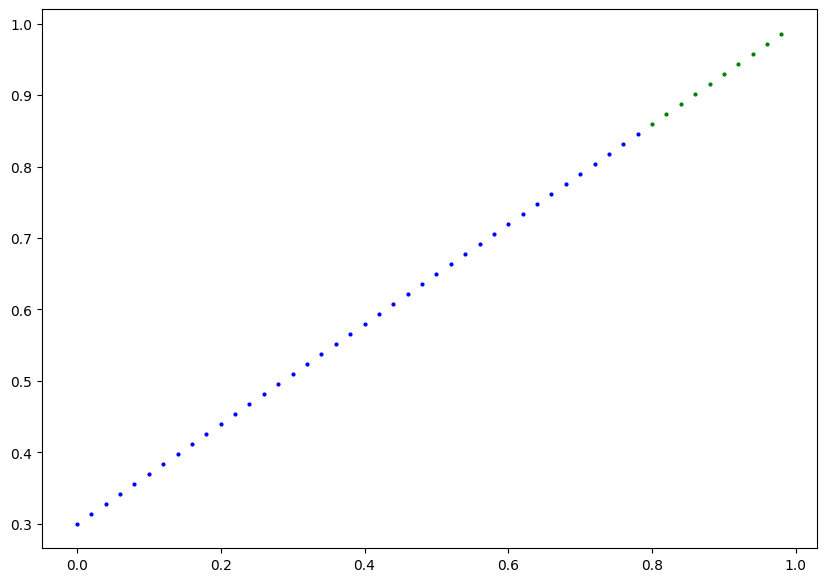

In [46]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving & loading a trained model

In [47]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [48]:
# Load a PyTorch model

# Create a new instance of linear regression modelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to (device)

<ipython-input-48-47e622715c2f>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [49]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [50]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')